In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#### Data for this analysis is a csv file from kaggle.com.  It contains daily COVID-19 data for 225 countries from Jan 2020 to May 2022. 

[Covid-19 Dataset](https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset)

In [2]:
# Read in CSV
datafile = Path("worldometer_coronavirus_daily_data.csv")
daily_covid_df = pd.read_csv(datafile)

# Convert date column to datetime and create a 'year_month' column
daily_covid_df['date'] = pd.to_datetime(daily_covid_df['date'])
daily_covid_df['year_month'] = daily_covid_df['date'].dt.strftime('%Y-%m')
daily_covid_df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,year_month
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
...,...,...,...,...,...,...,...,...
184782,2022-05-10,Zimbabwe,248642.0,106.0,963.0,5481.0,2.0,2022-05
184783,2022-05-11,Zimbabwe,248778.0,136.0,1039.0,5481.0,0.0,2022-05
184784,2022-05-12,Zimbabwe,248943.0,165.0,1158.0,5481.0,0.0,2022-05
184785,2022-05-13,Zimbabwe,249131.0,188.0,1283.0,5482.0,1.0,2022-05


# What are the relationships between new cases, active cases and deaths worldwide?

#### Sort the dataset for analysis

In [3]:
# Groupby to create dataframes for global daily averages
avg_new_cases_df = daily_covid_df.groupby('date')['daily_new_cases'].mean().reset_index()
avg_active_cases_df = daily_covid_df.groupby('date')['active_cases'].mean().reset_index()
avg_deaths_df = daily_covid_df.groupby('date')['daily_new_deaths'].mean().reset_index()

# Merge the groupby dataframes into one dataframe for plotting
avg_df = pd.merge(pd.merge(avg_new_cases_df, avg_active_cases_df, on=['date']), avg_deaths_df, on='date')
avg_df.set_index('date', inplace=True)

#### Plot the sorted data and create a correlation matrix

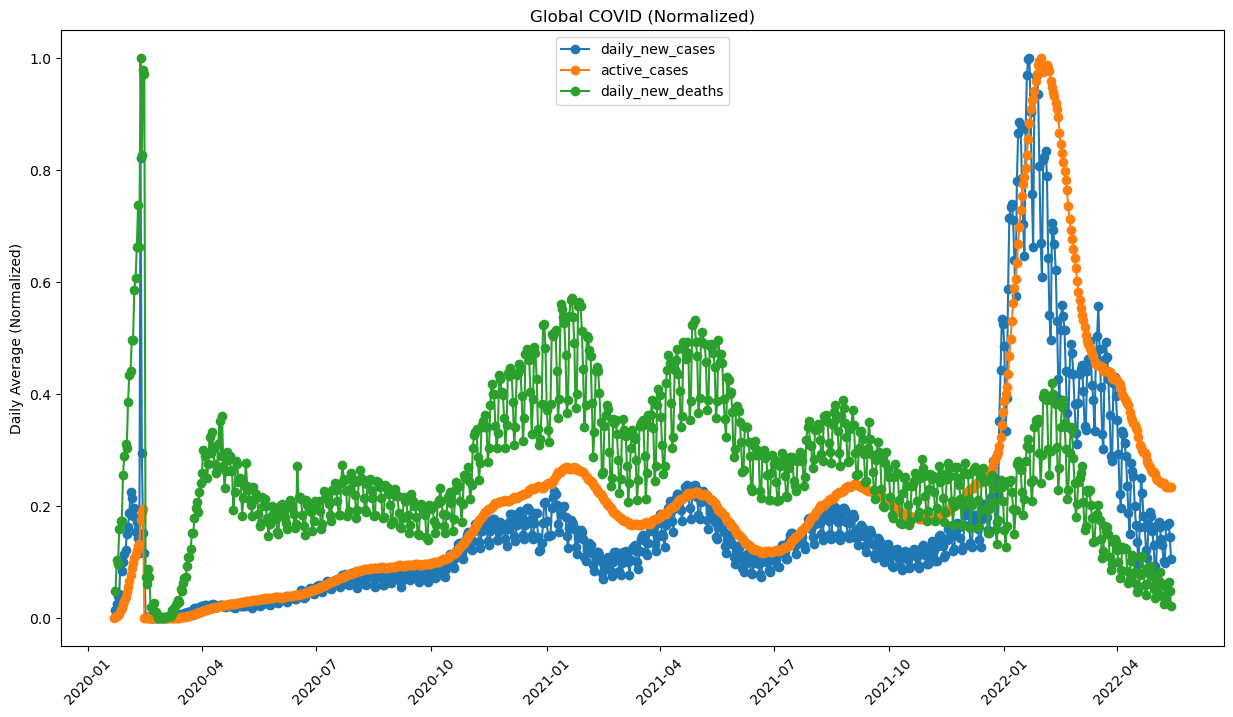

In [4]:
# Normalize the data in each column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(avg_df)
avg_normalized_df = pd.DataFrame(scaled_data, columns=avg_df.columns, index=avg_df.index)

# Plot the normalized data
plt.figure(figsize=(15, 8))
for column in avg_normalized_df.columns:
    plt.plot(avg_normalized_df.index, avg_normalized_df[column], marker='o', linestyle='-', label=column)

plt.title('Global COVID (Normalized)')
plt.ylabel('Daily Average (Normalized)')
plt.legend(loc='upper center')
plt.xticks(rotation=45)
plt.savefig("output_data/Global_COVID_Daily_Average")
plt.show()

                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.911469          0.197524
active_cases             0.911469      1.000000          0.139593
daily_new_deaths         0.197524      0.139593          1.000000


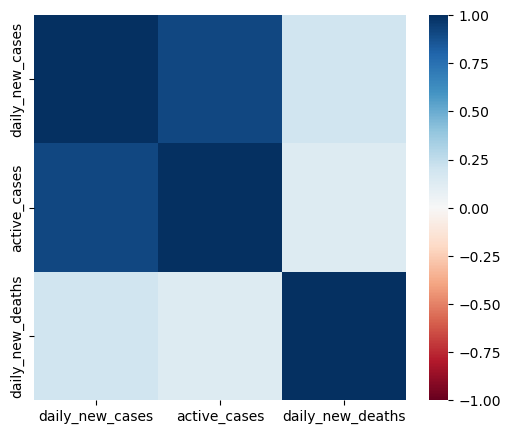

In [5]:
# Create dataframe without null values for correlation matrix and compute correlation matrix
avg_matrix_df = avg_normalized_df.dropna(subset=['daily_new_cases', 'active_cases', 'daily_new_deaths'])
avg_correlation_matrix = avg_matrix_df[['daily_new_cases', 'active_cases', 'daily_new_deaths']].corr()
print(avg_correlation_matrix)
plt.figure(figsize=(6, 5))
heatmap = sns.heatmap(avg_correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1)
plt.savefig("output_data/global_average_heatmap.png")

In [6]:
# Groupby to create dataframes for global daily totals
tot_new_cases_df = daily_covid_df.groupby('date')['daily_new_cases'].sum().reset_index()
tot_active_cases_df = daily_covid_df.groupby('date')['active_cases'].sum().reset_index()
tot_deaths_df = daily_covid_df.groupby('date')['daily_new_deaths'].sum().reset_index()

# Merge the groupby dataframes into one dataframe for plotting
tot_df = pd.merge(pd.merge(tot_new_cases_df, tot_active_cases_df, on=['date']), tot_deaths_df, on='date')
tot_df.set_index('date', inplace=True)

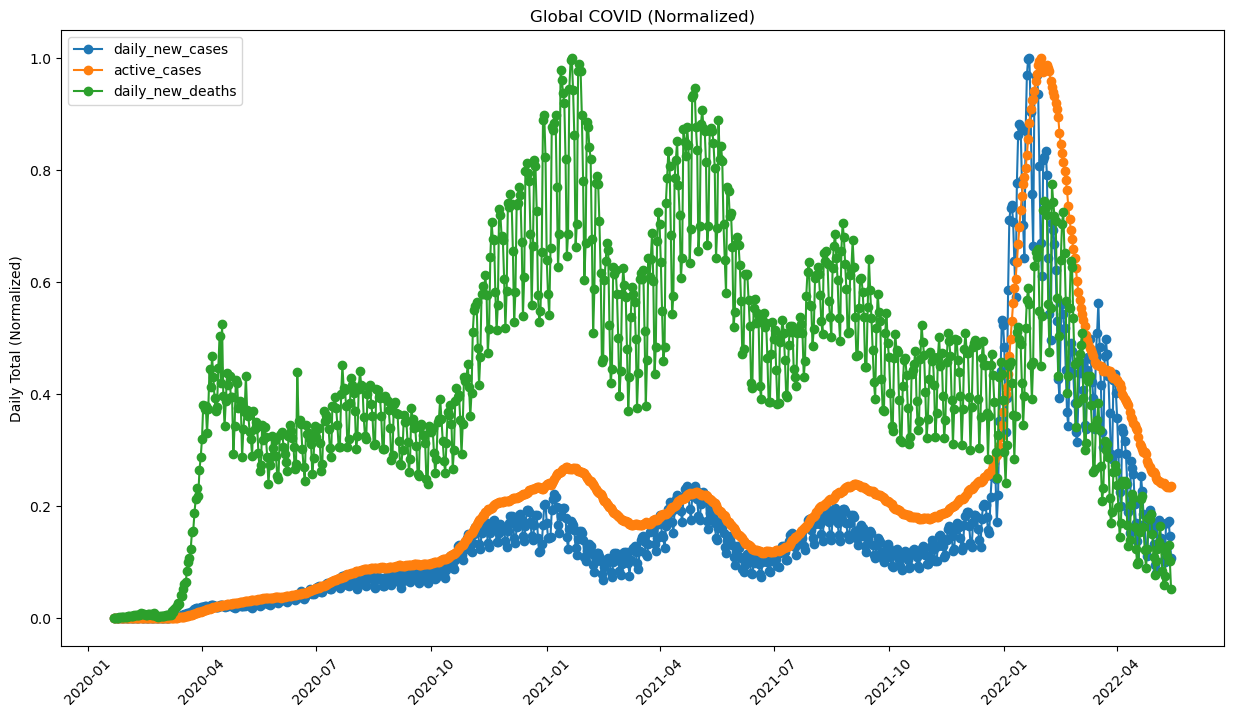

In [7]:
# Normalize the data in each column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tot_df)
tot_normalized_df = pd.DataFrame(scaled_data, columns=tot_df.columns, index=tot_df.index)

# Plot the normalized data
plt.figure(figsize=(15, 8))
for column in tot_normalized_df.columns:
    plt.plot(tot_normalized_df.index, tot_normalized_df[column], marker='o', linestyle='-', label=column)

plt.title('Global COVID (Normalized)')
plt.ylabel('Daily Total (Normalized)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.savefig("output_data/Global_COVID_Daily_Total")
plt.show()

                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.928346          0.292867
active_cases             0.928346      1.000000          0.301694
daily_new_deaths         0.292867      0.301694          1.000000


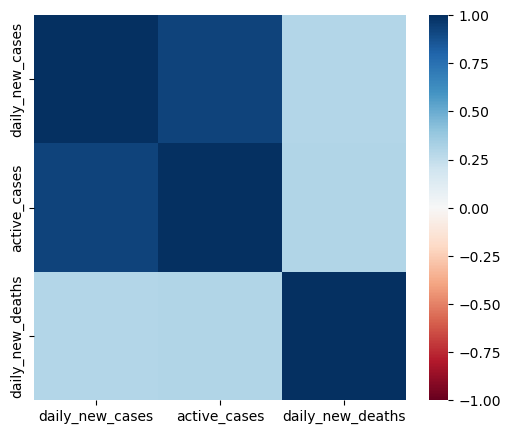

In [8]:
# Create dataframe without null values for correlation matrix and compute correlation matrix
tot_matrix_df = tot_normalized_df.dropna(subset=['daily_new_cases', 'active_cases', 'daily_new_deaths'])
tot_correlation_matrix = tot_matrix_df[['daily_new_cases', 'active_cases', 'daily_new_deaths']].corr()
print(tot_correlation_matrix)
plt.figure(figsize=(6, 5))
heatmap = sns.heatmap(tot_correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1)
plt.savefig("output_data/global_total_heatmap.png")

## Investigate the spike in the daily average data before April 2020

In [9]:
avg_df.head()

,daily_new_cases,active_cases,daily_new_deaths
date,,,
2020-01-22,NaN,554.0,NaN
2020-01-23,259.0,771.0,8.0
2020-01-24,457.0,1208.0,16.0
2020-01-25,688.0,1870.0,15.0
2020-01-26,769.0,2613.0,24.0


#### Sort for data before April 2020 then zoom in on the maximum values

In [10]:
# Find the date range of the spike
spike_new_cases_df = avg_df.loc[(avg_df.index < '2020-04-01')]
spike_new_cases_df = (spike_new_cases_df.groupby(['date'])['daily_new_cases'].max()
                                        .reset_index()
                                        .sort_values(by='daily_new_cases', ascending=False)
                     )
spike_active_cases_df = avg_df.loc[(avg_df.index < '2020-04-01')]
spike_active_cases_df = (spike_active_cases_df.groupby(['date'])['active_cases'].max()
                                              .reset_index()
                                              .sort_values(by='active_cases', ascending=False)
                        )
spike_deaths_df = avg_df.loc[(avg_df.index < '2020-04-01')]
spike_deaths_df = (spike_deaths_df.groupby(['date'])['daily_new_deaths'].max()
                                  .reset_index()
                                  .sort_values(by='daily_new_deaths', ascending=False)
                  )

# Merge the groupby dataframes into one dataframe for plotting
spike_df = pd.merge(pd.merge(spike_new_cases_df, spike_active_cases_df, on=['date'], how='outer'), 
                    spike_deaths_df, on='date', how='outer')
spike_df.set_index('date', inplace=True)
spike_df.head()

,daily_new_cases,active_cases,daily_new_deaths
date,,,
2020-02-12,14108.0,51591.0,146.0
2020-02-13,5090.0,55748.0,121.0
2020-02-04,3884.0,22942.0,65.0
2020-02-05,3694.0,26302.0,73.0
2020-02-07,3385.0,31774.0,86.0


In [11]:
# Look at original dataframe for new cases, active cases and deaths around 2020-02-12 and 13
country_spike_df = daily_covid_df.loc[(daily_covid_df['date'] >= '2020-02-11') & (daily_covid_df['date'] <= '2020-02-15')]
country_spike_df = country_spike_df.sort_values(by='date', ascending=True)

country_spike_df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,year_month
36100,2020-02-11,China,44653.0,2015.0,38791.0,1113.0,97.0,2020-02
36101,2020-02-12,China,58761.0,14108.0,51591.0,1259.0,146.0,2020-02
36102,2020-02-13,China,63851.0,5090.0,55748.0,1380.0,121.0,2020-02
36103,2020-02-14,China,66492.0,2641.0,56873.0,1523.0,143.0,2020-02
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
...,...,...,...,...,...,...,...,...
64804,2020-02-15,Ghana,0.0,NaN,0.0,0.0,NaN,2020-02
65624,2020-02-15,Gibraltar,0.0,NaN,0.0,0.0,NaN,2020-02
66444,2020-02-15,Greece,0.0,NaN,0.0,0.0,NaN,2020-02
91044,2020-02-15,Latvia,0.0,NaN,0.0,0.0,NaN,2020-02


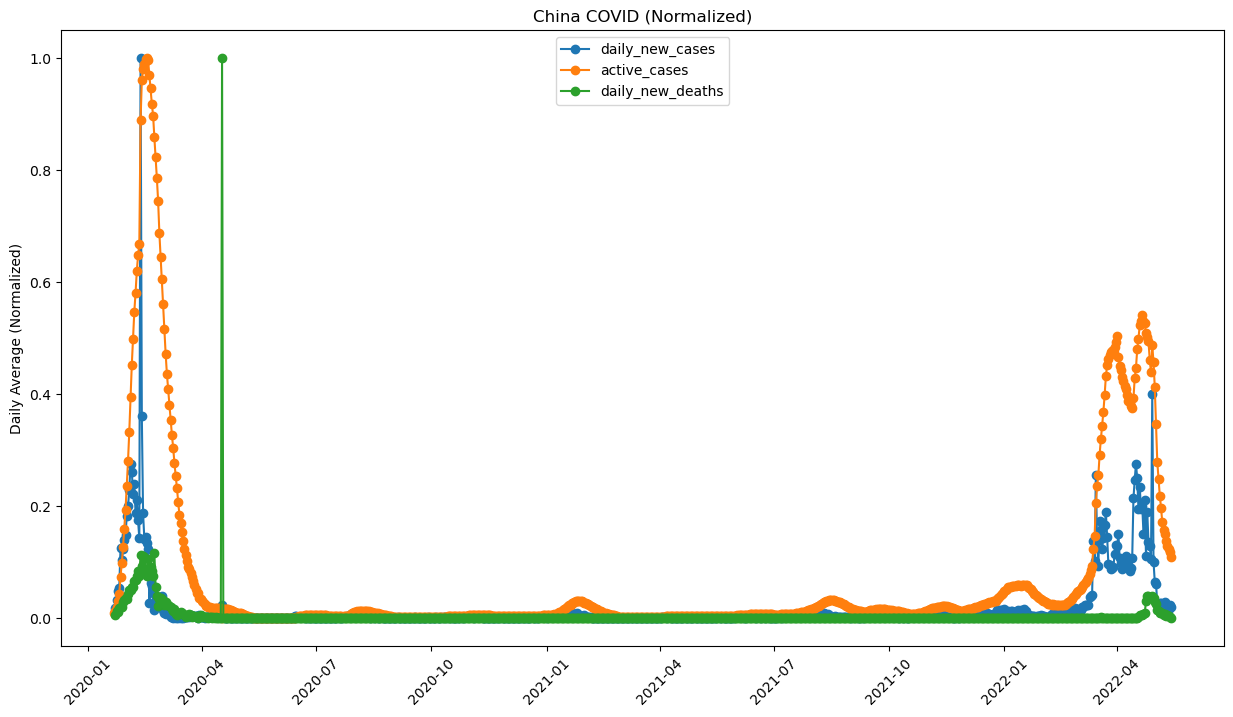

In [12]:
china_df = daily_covid_df.loc[(daily_covid_df['country'] == 'China')]
china_df = china_df[['date', 'daily_new_cases', 'active_cases', 'daily_new_deaths']].set_index('date')
china_df.head()
# Normalize the data in each column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(china_df)
china_normalized_df = pd.DataFrame(scaled_data, columns=china_df.columns, index=china_df.index)

# Plot the normalized data
plt.figure(figsize=(15, 8))
for column in china_normalized_df.columns:
    plt.plot(china_normalized_df.index, china_normalized_df[column], marker='o', linestyle='-', label=column)

plt.title('China COVID (Normalized)')
plt.ylabel('Daily Average (Normalized)')
plt.legend(loc='upper center')
plt.xticks(rotation=45)
plt.savefig("output_data/China_COVID_Daily")
plt.show()

In [13]:
# Create dataframe without null values for correlation matrix and compute correlation matrix
china_matrix_df = china_df.dropna(subset=['daily_new_cases', 'active_cases', 'daily_new_deaths'])
china_correlation_matrix = china_matrix_df[['daily_new_cases', 'active_cases', 'daily_new_deaths']].corr()

print(china_correlation_matrix)

                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.671677          0.224456
active_cases             0.671677      1.000000          0.300504
daily_new_deaths         0.224456      0.300504          1.000000


# What are the relationships between new cases, active cases and deaths in the countries with the most COVID cases and do they align with the global trend?

In [14]:
# Countries with the most COVID cases

In [15]:
# Find the countries with the most cases
most_cases_df = (daily_covid_df.groupby('country')['cumulative_total_cases']
                               .max()
                               .reset_index()
                               .sort_values(by='cumulative_total_cases', ascending=False)
                )
most_cases_df.head(10)

,country,cumulative_total_cases
212,USA,84209473.0
94,India,43121599.0
26,Brazil,30682094.0
72,France,29160802.0
78,Germany,25774509.0
211,UK,22159805.0
165,Russia,18255337.0
189,South Korea,17756627.0
101,Italy,17030711.0
209,Turkey,15053168.0


In [16]:
# Create a list and dataframe of Countries with the most cases
most_covid_countries = ['USA', 'India', 'Brazil', 'France', 'Germany', 'China']
most_covid_df = daily_covid_df[daily_covid_df['country'].isin(most_covid_countries)]

# Group by 'year_month' and 'country' and calculate the monthly averages and order columns to match most covid list
top_new_cases_df = most_covid_df.groupby(['year_month', 'country'])['daily_new_cases'].mean().unstack().fillna(0)
top_new_cases_df = top_new_cases_df[most_covid_countries]
top_active_df = most_covid_df.groupby(['year_month', 'country'])['active_cases'].mean().unstack().fillna(0)
top_active_df = top_active_df[most_covid_countries]
top_new_deaths_df = most_covid_df.groupby(['year_month', 'country'])['daily_new_deaths'].mean().unstack().fillna(0)
top_new_deaths_df = top_new_deaths_df[most_covid_countries]

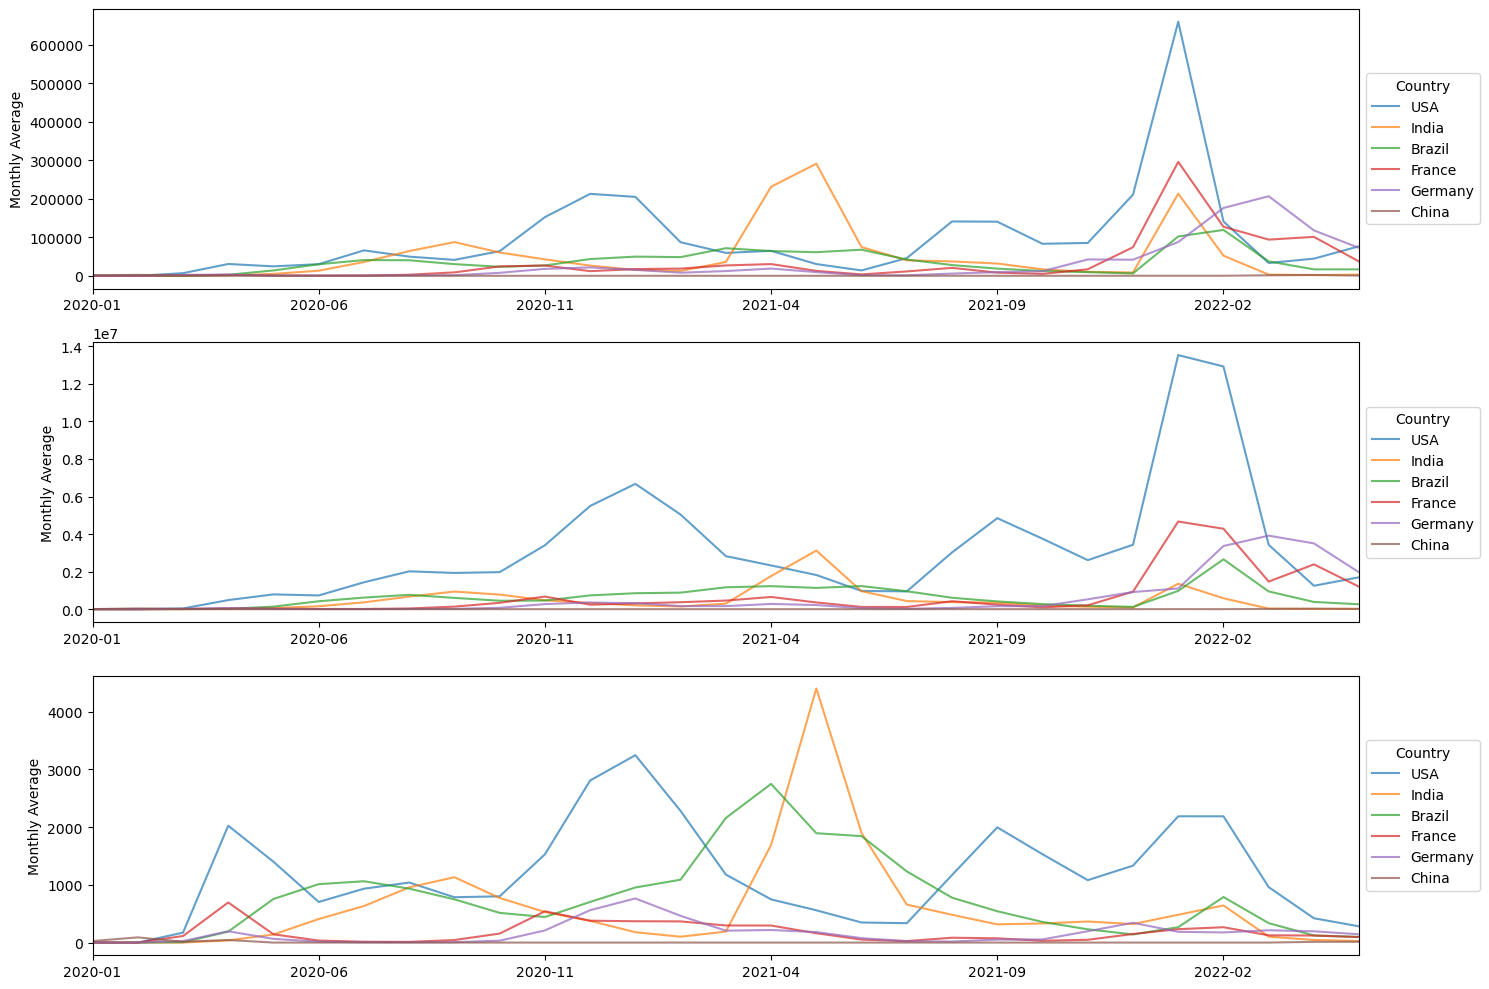

In [17]:
# Plot new cases, active cases and deaths for the countries with he most COVID
# Create subplots for each DataFrame
fig, axes = plt.subplots(3, figsize=(15, 10))

# Plot new cases
top_new_cases_df.plot.line(stacked=False, ax=axes[0], alpha=0.7)
# axes[0].set_title('Daily New Cases by Country')
axes[0].set_ylabel('Monthly Average')
axes[0].set_xlabel('')
axes[0].set_xlim(0, 28)
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))

# Plot active cases
top_active_df.plot.line(stacked=False, ax=axes[1], alpha=0.7)
# axes[1].set_title('Active Cases by Country')
axes[1].set_ylabel('Monthly Average')
axes[1].set_xlabel('')
axes[1].set_xlim(0, 28)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))

# Plot new deaths
top_new_deaths_df.plot.line(stacked=False, ax=axes[2], alpha=0.7)
# axes[2].set_title('Daily New Deaths by Country')
axes[2].set_ylabel('Monthly Average')
axes[2].set_xlabel('')
axes[2].set_xlim(0, 28)
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("output_data/Most_Daily_Average")
plt.tight_layout()
plt.show()

USA Correlation Matrix
                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.721603          0.506710
active_cases             0.721603      1.000000          0.613813
daily_new_deaths         0.506710      0.613813          1.000000

India Correlation Matrix
                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.958324          0.783506
active_cases             0.958324      1.000000          0.903111
daily_new_deaths         0.783506      0.903111          1.000000

Brazil Correlation Matrix
                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.782049          0.527148
active_cases             0.782049      1.000000          0.462917
daily_new_deaths         0.527148      0.462917          1.000000

France Correlation Matrix
                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      

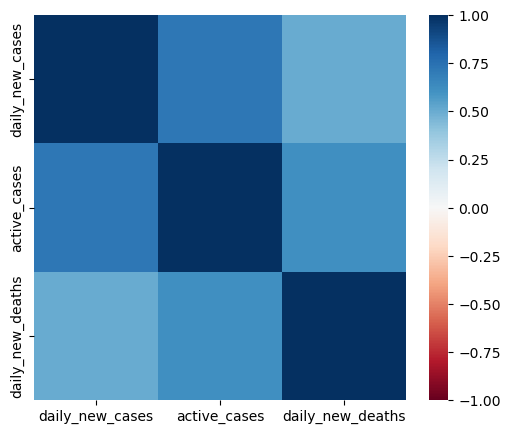

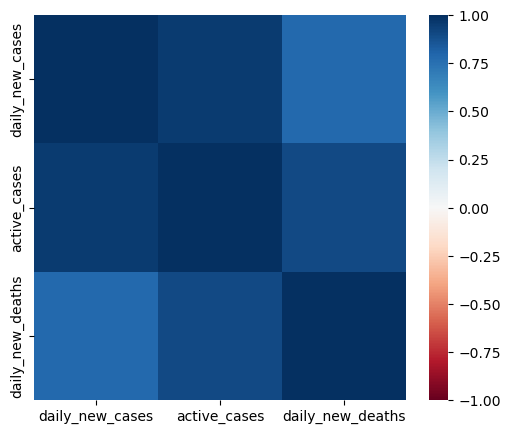

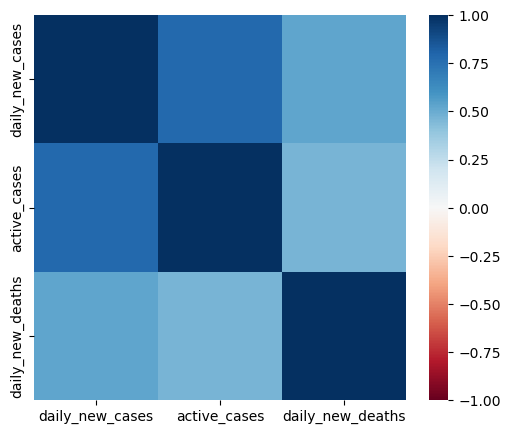

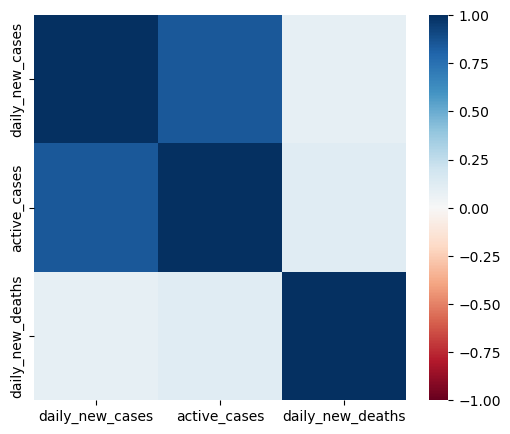

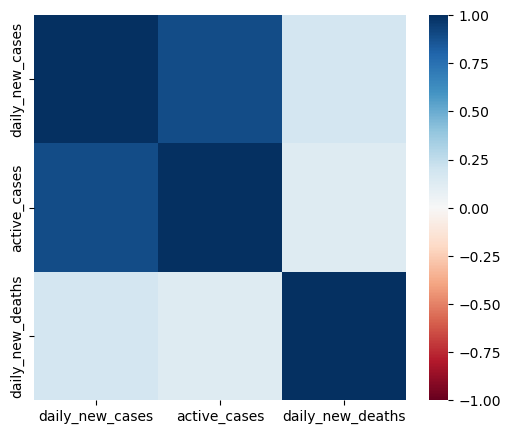

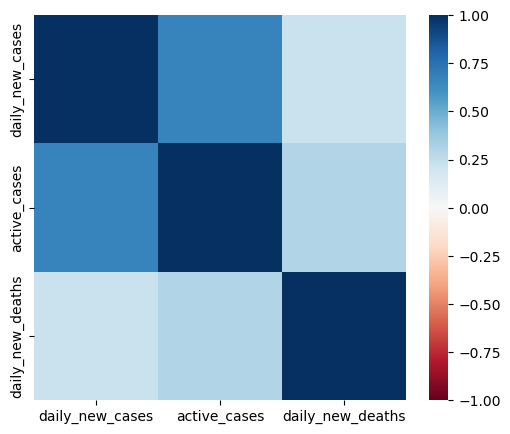

In [19]:
# Loop through the most covids countries list to create a correlation matrix for each
for countries in most_covid_countries:
    most_covid_matrix_df = most_covid_df.loc[(most_covid_df['country'] == countries)]
    most_covid_matrix_df = most_covid_matrix_df.dropna(subset=['daily_new_cases', 'active_cases', 'daily_new_deaths'])
    most_covid_correlation_matrix = most_covid_matrix_df[['daily_new_cases', 'active_cases', 'daily_new_deaths']].corr()
    print(f"{countries} Correlation Matrix")
    print(most_covid_correlation_matrix)
    plt.figure(figsize=(6, 5))
    heatmap = sns.heatmap(most_covid_correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1)
    # plt.title(f"{countries} Heat Map")
    plt.savefig(f"output_data/{countries}_heatmap.png")
    print('')